In [1]:
##################
### Author: Adriano Fonzino. email: adriano.fonzino@uniba.it
##################
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          path=None):
    '''
    ###############################################################################################
    CITATION: taken from: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
    ###############################################################################################
    
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sn.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    
    if path:
        plt.tight_layout()
        plt.savefig(path)


# plot different version of consensus graphs
def create_sequence_logo(df, color_scheme=None, ax=None, title=None):
    '''
    Produce Consensus plot.
    '''
    if color_scheme == None:
        color_scheme={"*":"black",
                      "T": "red",
                      "A":"green",
                      "C":"blue",
                      "G":"orange"}
    else:
        color_scheme = color_scheme
    
    if ax == None:
        crp_logo = logomaker.Logo(df,
                                  shade_below=.5,
                                  fade_below=.5,
                                  font_name='Arial Rounded MT Bold', 
                                  color_scheme=color_scheme)
        # style using Logo methods
        crp_logo.style_spines(visible=False)
        crp_logo.style_spines(spines=['left', 'bottom'], visible=True)

        # style using Axes methods
        crp_logo.ax.set_ylabel("Frequency", labelpad=-1)
        crp_logo.ax.xaxis.set_ticks_position('none')
        crp_logo.ax.xaxis.set_tick_params(pad=-1)
        plt.title(title)

In [2]:
output_folder = "/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_publicdata"

In [3]:
# load predictions and bonafide WT1/KO1
wt1_preds = pd.read_table(os.path.join(output_folder, "outTable_724242056_predictions.txt"))
print(wt1_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_publicdata/SRR5564274.wildtype.outTable_724242056.gz_vs_SRR5564272.ADAR1_KO.outTable_816573740.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko1_preds = pd.read_table(os.path.join(output_folder, "outTable_816573740_predictions.txt"))
print(ko1_preds.shape)
wt1_preds = pd.merge(bonafide, wt1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt1_preds.shape)
ko1_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko1_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko1_preds.shape)
couple1_preds = pd.concat([wt1_preds, ko1_preds], ignore_index=True)
couple1_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple1_preds["Predicted_Class"]]
couple1_preds["couple"] = "couple1"
couple1_preds

(3636, 15)
(7012, 38)
(2909, 15)
(2691, 53)
(1008, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,217930,A,1,44,35.32,"[42, 0, 2, 0]",AG,0.05,chrX,...,"[42, 0, 2, 0]",217880,217980,0,[],0.0,1.000000e+00,Editing,1,couple1
1,chrX,218542,A,1,32,36.38,"[30, 0, 2, 0]",AG,0.06,chrX,...,"[30, 0, 2, 0]",218492,218592,0,[],0.0,1.000000e+00,Editing,1,couple1
2,chrX,12840861,A,1,181,35.43,"[179, 0, 2, 0]",AG,0.01,chrX,...,"[179, 0, 2, 0]",12840811,12840911,0,[],0.0,1.000000e+00,Editing,1,couple1
3,chrX,16779093,A,1,96,36.71,"[94, 0, 2, 0]",AG,0.02,chrX,...,"[94, 0, 2, 0]",16779043,16779143,0,[],0.0,1.000000e+00,Editing,1,couple1
4,chrX,16779279,A,1,60,35.23,"[58, 0, 2, 0]",AG,0.03,chrX,...,"[58, 0, 2, 0]",16779229,16779329,0,[],0.0,1.000000e+00,Editing,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,chr8,104432545,A,1,234,37.12,"[67, 0, 167, 0]",AG,0.71,chr8,...,"[162, 0, 302, 0]",104432495,104432595,0,[],1.0,1.077472e-19,Not_Editing,0,couple1
3695,chr8,109499182,A,1,31,35.32,"[0, 0, 31, 0]",AG,1.00,chr8,...,"[0, 0, 33, 0]",109499132,109499232,0,[],1.0,5.192952e-08,Not_Editing,0,couple1
3696,chr8,120847188,A,0,198,35.25,"[0, 0, 198, 0]",AG,1.00,chr8,...,"[0, 0, 258, 0]",120847138,120847238,0,[],1.0,1.637786e-11,Not_Editing,0,couple1
3697,chr8,121530190,A,1,66,35.80,"[0, 0, 66, 0]",AG,1.00,chr8,...,"[0, 0, 86, 0]",121530140,121530240,0,[],1.0,7.085994e-19,Not_Editing,0,couple1


In [4]:
# load predictions and bonafide WT2/KO2
wt2_preds = pd.read_table(os.path.join(output_folder, "outTable_580067564_predictions.txt"))
print(wt2_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_publicdata/SRR5564275.wildtype.outTable_580067564.gz_vs_SRR5564273.ADAR1_KO.outTable_718392497.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko2_preds = pd.read_table(os.path.join(output_folder, "outTable_718392497_predictions.txt"))
print(ko2_preds.shape)
wt2_preds = pd.merge(bonafide, wt2_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt2_preds.shape)
ko2_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko2_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko2_preds.shape)
couple2_preds = pd.concat([wt2_preds, ko2_preds], ignore_index=True)
couple2_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple2_preds["Predicted_Class"]]
couple2_preds["couple"] = "couple2"
couple2_preds

(5601, 15)
(8505, 38)
(2275, 15)
(3161, 53)
(1040, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,217930,A,1,81,37.02,"[79, 0, 2, 0]",AG,0.02,chrX,...,"[79, 0, 2, 0]",217880,217980,0,[],0.000000,1.000000e+00,Editing,1,couple2
1,chrX,218174,A,1,46,37.89,"[44, 0, 2, 0]",AG,0.04,chrX,...,"[44, 0, 2, 0]",218124,218224,0,[],0.000000,1.000000e+00,Editing,1,couple2
2,chrX,228249,A,0,101,34.82,"[99, 0, 2, 0]",AG,0.02,chrX,...,"[99, 0, 2, 0]",228199,228299,0,[],0.000011,9.999890e-01,Editing,1,couple2
3,chrX,13707325,A,1,117,38.26,"[115, 0, 2, 0]",AG,0.02,chrX,...,"[115, 0, 2, 0]",13707275,13707375,0,[],0.000000,1.000000e+00,Editing,1,couple2
4,chrX,16779055,A,1,139,37.15,"[137, 0, 2, 0]",AG,0.01,chrX,...,"[137, 0, 2, 0]",16779005,16779105,0,[],0.000000,1.000000e+00,Editing,1,couple2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,chr8,120847188,A,0,190,35.33,"[0, 0, 190, 0]",AG,1.00,chr8,...,"[0, 0, 166, 0]",120847138,120847238,0,[],1.000000,2.788461e-07,Not_Editing,0,couple2
4197,chr8,121530190,A,1,94,35.28,"[0, 0, 94, 0]",AG,1.00,chr8,...,"[0, 0, 55, 0]",121530140,121530240,0,[],1.000000,4.576910e-20,Not_Editing,0,couple2
4198,chr8,124027628,A,0,189,36.45,"[0, 0, 189, 0]",AG,1.00,chr8,...,"[0, 0, 151, 0]",124027578,124027678,0,[],1.000000,2.750726e-13,Not_Editing,0,couple2
4199,chr8,145066886,A,1,284,36.31,"[0, 0, 284, 0]",AG,1.00,chr8,...,"[0, 0, 123, 0]",145066836,145066936,0,[],1.000000,2.594668e-12,Not_Editing,0,couple2


In [5]:
# load predictions and bonafide WT3/KO3
wt3_preds = pd.read_table(os.path.join(output_folder, "outTable_181728208_predictions.txt"))
print(wt3_preds.shape)
bonafide = pd.read_table("/lustre/bio_running/new_basecaller/REDINET_TEST_30_07_2024/REDInet/Package/Results/hek_publicdata/SRR5564276.wildtype.outTable_181728208.gz_vs_SRR5564268.ADAR1_KO.outTable_854894021.gz.bonafide_final.tsv.anno.filt_refseq.tsv")
print(bonafide.shape)
ko3_preds = pd.read_table(os.path.join(output_folder, "outTable_854894021_predictions.txt"))
print(ko3_preds.shape)
wt3_preds = pd.merge(bonafide, wt3_preds, left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(wt3_preds.shape)
ko3_preds = pd.merge(bonafide.query("Class_x == 'Not-Editing'"), ko3_preds, 
                     left_on=["wt_Region", "wt_Position"],
                     right_on=["Region", "Position"], how="inner")
print(ko3_preds.shape)
couple3_preds = pd.concat([wt3_preds, ko3_preds], ignore_index=True)
couple3_preds["Predicted_Class_binary"] = [1 if i=="Editing" else 0 for i in couple3_preds["Predicted_Class"]]
couple3_preds["couple"] = "couple3"
couple3_preds

(5727, 15)
(11039, 38)
(3867, 15)
(4326, 53)
(1234, 53)


,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,216802,A,1,51,37.86,"[49, 0, 2, 0]",AG,0.04,chrX,...,"[49, 0, 2, 0]",216752,216852,0,[],0.0,1.000000e+00,Editing,1,couple3
1,chrX,216807,A,1,53,37.62,"[50, 0, 3, 0]",AG,0.06,chrX,...,"[50, 0, 3, 0]",216757,216857,0,[],0.0,1.000000e+00,Editing,1,couple3
2,chrX,217470,A,1,43,35.72,"[41, 0, 2, 0]",AG,0.05,chrX,...,"[41, 0, 2, 0]",217420,217520,0,[],0.0,1.000000e+00,Editing,1,couple3
3,chrX,217471,A,1,42,35.33,"[38, 0, 4, 0]",AG,0.10,chrX,...,"[38, 0, 4, 0]",217421,217521,0,[],0.0,1.000000e+00,Editing,1,couple3
4,chrX,217475,A,1,44,35.64,"[41, 0, 3, 0]",AG,0.07,chrX,...,"[41, 0, 3, 0]",217425,217525,0,[],0.0,1.000000e+00,Editing,1,couple3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,chr21,47635176,A,0,134,36.46,"[74, 0, 60, 0]",AG,0.45,chr21,...,"[113, 0, 51, 0]",47635126,47635226,0,[],1.0,8.480723e-20,Not_Editing,0,couple3
5556,chr21,47705237,A,0,139,36.01,"[31, 0, 108, 0]",AG,0.78,chr21,...,"[54, 0, 168, 0]",47705187,47705287,0,[],1.0,1.319459e-15,Not_Editing,0,couple3
5557,chr21,47851753,A,1,62,35.55,"[44, 0, 18, 0]",AG,0.29,chr21,...,"[68, 0, 44, 0]",47851703,47851803,0,[],1.0,1.267648e-12,Not_Editing,0,couple3
5558,chr21,47862624,A,1,43,37.19,"[0, 0, 43, 0]",AG,1.00,chr21,...,"[0, 0, 39, 0]",47862574,47862674,0,[],1.0,1.330860e-20,Not_Editing,0,couple3


In [6]:
# merge prediction into a unique list
merged_preds = pd.concat([couple1_preds, couple2_preds, couple3_preds], axis=0)
merged_preds

,wt_Region,wt_Position,wt_Reference,wt_Strand,wt_Coverage-q30,wt_MeanQ,"wt_BaseCount[A,C,G,T]",wt_AllSubs,wt_Frequency,ko_Region,...,Bases_Count,Start,Stop,Missing_Nucleotides_Count,Missing_Nucleotides_Positions,Not_Editing_Probability,Editing_Probability,Predicted_Class,Predicted_Class_binary,couple
0,chrX,217930,A,1,44,35.32,"[42, 0, 2, 0]",AG,0.05,chrX,...,"[42, 0, 2, 0]",217880,217980,0,[],0.0,1.000000e+00,Editing,1,couple1
1,chrX,218542,A,1,32,36.38,"[30, 0, 2, 0]",AG,0.06,chrX,...,"[30, 0, 2, 0]",218492,218592,0,[],0.0,1.000000e+00,Editing,1,couple1
2,chrX,12840861,A,1,181,35.43,"[179, 0, 2, 0]",AG,0.01,chrX,...,"[179, 0, 2, 0]",12840811,12840911,0,[],0.0,1.000000e+00,Editing,1,couple1
3,chrX,16779093,A,1,96,36.71,"[94, 0, 2, 0]",AG,0.02,chrX,...,"[94, 0, 2, 0]",16779043,16779143,0,[],0.0,1.000000e+00,Editing,1,couple1
4,chrX,16779279,A,1,60,35.23,"[58, 0, 2, 0]",AG,0.03,chrX,...,"[58, 0, 2, 0]",16779229,16779329,0,[],0.0,1.000000e+00,Editing,1,couple1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,chr21,47635176,A,0,134,36.46,"[74, 0, 60, 0]",AG,0.45,chr21,...,"[113, 0, 51, 0]",47635126,47635226,0,[],1.0,8.480723e-20,Not_Editing,0,couple3
5556,chr21,47705237,A,0,139,36.01,"[31, 0, 108, 0]",AG,0.78,chr21,...,"[54, 0, 168, 0]",47705187,47705287,0,[],1.0,1.319459e-15,Not_Editing,0,couple3
5557,chr21,47851753,A,1,62,35.55,"[44, 0, 18, 0]",AG,0.29,chr21,...,"[68, 0, 44, 0]",47851703,47851803,0,[],1.0,1.267648e-12,Not_Editing,0,couple3
5558,chr21,47862624,A,1,43,37.19,"[0, 0, 43, 0]",AG,1.00,chr21,...,"[0, 0, 39, 0]",47862574,47862674,0,[],1.0,1.330860e-20,Not_Editing,0,couple3


In [7]:
# save to disk full predictions
merged_preds.to_csv(os.path.join(output_folder, "MERGED_PREDS.tsv"), sep="\t", index=None)

In [8]:
print(classification_report(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6541
           1       0.93      0.98      0.96      6919

    accuracy                           0.95     13460
   macro avg       0.95      0.95      0.95     13460
weighted avg       0.95      0.95      0.95     13460



In [9]:
print("Accuracy:", accuracy_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Balanced Accuracy:", balanced_accuracy_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Precision:", precision_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("Recall:", recall_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
print("F1-score", f1_score(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values))
cm = confusion_matrix(merged_preds["Class_binary"].values, merged_preds["Predicted_Class_binary"].values)
print(cm)

Accuracy: 0.9525260029717681
Balanced Accuracy: 0.9517305641166897
Precision: 0.9312002197198572
Recall: 0.9800549212313918
F1-score 0.9550031687909302
[[6040  501]
 [ 138 6781]]


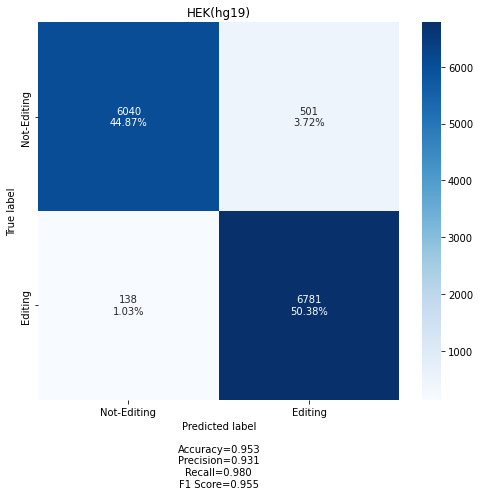

In [10]:
# confusion matrix
make_confusion_matrix(cf=cm,
                          group_names=None,
                          categories=["Not-Editing", "Editing"],
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(7,7),
                          cmap='Blues',
                          title="HEK(hg19)",
                          path=os.path.join(output_folder, "ConfMatr.tiff"))